⚙️ CLIP Fine-Tuning Food Retrieval Project
🎯 Objective

Build an AI-powered food search system that retrieves dishes from a dataset based on text or image queries using a fine-tuned CLIP model (Contrastive Language–Image Pretraining).
The project includes:

Python FastAPI backend for CLIP fine-tuning and inference

Java CLI client for user interaction and data display

Data preparation.
Used kaggle data.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("l33tc0d3r/indian-food-classification")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
import pandas as pd

# Source dataset path
src_dir = "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification"

# Destination path (Google Drive)
dst_dir = "/content/drive/MyDrive/FoodData"

# Create destination folder if not exists
os.makedirs(dst_dir, exist_ok=True)

# Initialize a list for CSV records
data_records = []

# Loop through each food class folder
for food_class in os.listdir(src_dir):
    class_path = os.path.join(src_dir, food_class)

    # Skip non-directory items
    if not os.path.isdir(class_path):
        continue

    # Create corresponding class folder in destination
    dest_class_path = os.path.join(dst_dir, food_class)
    os.makedirs(dest_class_path, exist_ok=True)

    # Iterate through images and copy them
    for file_name in os.listdir(class_path):
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            src_file = os.path.join(class_path, file_name)
            dst_file = os.path.join(dest_class_path, file_name)
            shutil.copy(src_file, dst_file)

            # Add record for CSV
            data_records.append({
                "food": food_class,
                "label": dst_file
            })

# Convert to DataFrame
df = pd.DataFrame(data_records)

# Save CSV inside the destination folder
csv_path = os.path.join(dst_dir, "food_labels.csv")
df.to_csv(csv_path, index=False)

print(f"✅ Data successfully copied to: {dst_dir}")
print(f"✅ CSV file saved at: {csv_path}")
print(f"📸 Total images processed: {len(df)}")


✅ Data successfully copied to: /content/drive/MyDrive/Food_data
✅ CSV file saved at: /content/drive/MyDrive/Food_data/food_labels.csv
📸 Total images processed: 6269


In [ ]:
df.rename(columns={"label": "image_path"}, inplace=True)

# Save back to the same CSV path
df.to_csv(csv_path, index=False)

print(f"✅ Column renamed and CSV saved successfully at: {csv_path}")
print(df.head())

✅ Column renamed and CSV saved successfully at: /content/drive/MyDrive/Food_data/food_labels.csv
            food                                         image_path
0  chole_bhature  /content/drive/MyDrive/Food_data/chole_bhature...
1  chole_bhature  /content/drive/MyDrive/Food_data/chole_bhature...
2  chole_bhature  /content/drive/MyDrive/Food_data/chole_bhature...
3  chole_bhature  /content/drive/MyDrive/Food_data/chole_bhature...
4  chole_bhature  /content/drive/MyDrive/Food_data/chole_bhature...


In [ ]:
df

,food,label
0,chole_bhature,/content/drive/MyDrive/Food_data/chole_bhature...
1,chole_bhature,/content/drive/MyDrive/Food_data/chole_bhature...
2,chole_bhature,/content/drive/MyDrive/Food_data/chole_bhature...
3,chole_bhature,/content/drive/MyDrive/Food_data/chole_bhature...
4,chole_bhature,/content/drive/MyDrive/Food_data/chole_bhature...
...,...,...
6264,idli,/content/drive/MyDrive/Food_data/idli/051.jpg
6265,idli,/content/drive/MyDrive/Food_data/idli/233.jpg
6266,idli,/content/drive/MyDrive/Food_data/idli/029.jpg
6267,idli,/content/drive/MyDrive/Food_data/idli/296.jpg


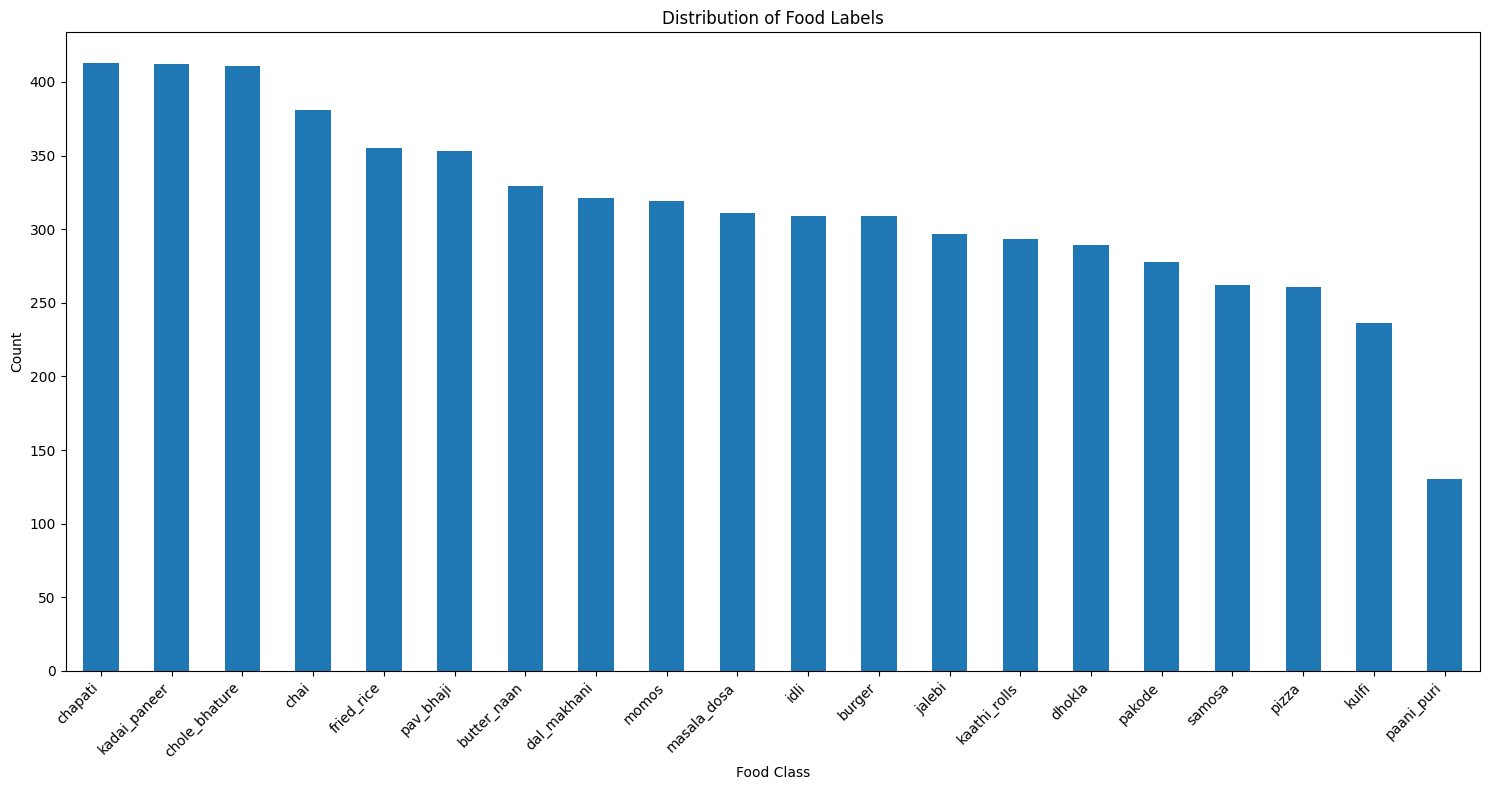

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each food label
food_counts = df['food'].value_counts()

# Create a bar plot
plt.figure(figsize=(15, 8))
food_counts.plot(kind='bar')
plt.title('Distribution of Food Labels')
plt.xlabel('Food Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
import os
import pandas as pd
import random
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
captions_df = pd.read_csv(captions_path)

In [ ]:

food_counts = captions_df['food'].value_counts()

# Calculate the average count
median = food_counts.median()

print(f"Median count of food items: {median:.2f}")

Median count of food items: 310.00


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image, ImageEnhance, ImageFilter
from tqdm import tqdm

# Example DataFrame (replace with your actual df)
# captions_df = pd.read_csv("your_file.csv")

# Compute image count per class
class_counts = captions_df['food'].value_counts()
median = int(class_counts.median())
print(f"Median number of images per class: {median}")

dst_dir = "/content/drive/MyDrive/FoodData_aug"
os.makedirs(dst_dir, exist_ok=True)

def augment_image(image):
    """Apply sharpening, brightness, and intensity augmentations."""
    # Convert to PIL for simplicity
    pil_img = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Sharpen
    sharpened = pil_img.filter(ImageFilter.SHARPEN)

    # Brightness adjustment
    enhancer = ImageEnhance.Brightness(sharpened)
    bright_img = enhancer.enhance(np.random.uniform(0.8, 1.2))  # random brightness

    # Intensity variation (contrast)
    enhancer = ImageEnhance.Contrast(bright_img)
    contrast_img = enhancer.enhance(np.random.uniform(0.8, 1.3))

    # Convert back to OpenCV format
    return cv2.cvtColor(np.array(contrast_img), cv2.COLOR_RGB2BGR)

# Process each food class
for food, group in tqdm(captions_df.groupby('food')):
    img_paths = group['image_path'].tolist()
    count = len(img_paths)

    # Create folder per food class
    food_dir = os.path.join(dst_dir, food)
    os.makedirs(food_dir, exist_ok=True)

    if count >= median:
        # Take only 'median' number of images
        selected = img_paths[:median]
        for img_path in selected:
            img = cv2.imread(img_path)
            if img is not None:
                filename = os.path.basename(img_path)
                cv2.imwrite(os.path.join(food_dir, filename), img)

    else:
        # Augment images until median count reached
        augment_needed = median - count
        base_imgs = img_paths * (augment_needed // count + 1)
        base_imgs = base_imgs[:augment_needed]

        # Save original + augmented
        for img_path in img_paths:
            img = cv2.imread(img_path)
            if img is not None:
                filename = os.path.basename(img_path)
                cv2.imwrite(os.path.join(food_dir, filename), img)

        # Augment and save
        for i, img_path in enumerate(base_imgs):
            img = cv2.imread(img_path)
            if img is not None:
                aug_img = augment_image(img)
                filename = f"aug_{i}_{os.path.basename(img_path)}"
                cv2.imwrite(os.path.join(food_dir, filename), aug_img)

print("✅ Data balancing and augmentation completed.")


Median number of images per class: 310


100%|██████████| 20/20 [59:57<00:00, 179.89s/it]

✅ Data balancing and augmentation completed.


In [ ]:
# ---- Create new CSV entries ----
import os
import pandas as pd

aug_path = "/content/drive/MyDrive/FoodData_aug"

# Collect image paths and corresponding class (folder name)
data = []

for root, dirs, files in os.walk(aug_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.webp')):
            food_name = os.path.basename(root)
            img_path = os.path.join(root, file)
            data.append({
                "food": food_name,
                "image_path": img_path
            })

# Create DataFrame
augmented_df = pd.DataFrame(data)

# Save CSV
csv_save_path = os.path.join(aug_path, "augumented_data.csv")
augmented_df.to_csv(csv_save_path, index=False)

print(f"✅ CSV created successfully: {csv_save_path}")
print(f"Total images found: {len(augmented_df)}")
augmented_df.head()



✅ CSV created successfully: /content/drive/MyDrive/FoodData_aug/augumented_data.csv
Total images found: 6200


,food,image_path
0,burger,/content/drive/MyDrive/FoodData_aug/burger/272...
1,burger,/content/drive/MyDrive/FoodData_aug/burger/004...
2,burger,/content/drive/MyDrive/FoodData_aug/burger/185...
3,burger,/content/drive/MyDrive/FoodData_aug/burger/225...
4,burger,/content/drive/MyDrive/FoodData_aug/burger/076...


Start from here

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import random
captions_path="/content/drive/MyDrive/Food_data/combined_food_dataset.csv"

In [ ]:

captions_df = pd.read_csv(captions_path)

In [ ]:
captions_df

,food,image_path,caption
0,chole_bhature,/content/drive/MyDrive/Food_data/chole_bhature...,This dish pairs a spicy and savory chickpea cu...
1,chole_bhature,/content/drive/MyDrive/Food_data/chole_bhature...,This dish pairs a spicy and savory chickpea cu...
2,chole_bhature,/content/drive/MyDrive/Food_data/chole_bhature...,This dish pairs a spicy and savory chickpea cu...
3,chole_bhature,/content/drive/MyDrive/Food_data/chole_bhature...,This dish pairs a spicy and savory chickpea cu...
4,chole_bhature,/content/drive/MyDrive/Food_data/chole_bhature...,This dish pairs a spicy and savory chickpea cu...
...,...,...,...
6264,idli,/content/drive/MyDrive/Food_data/idli/051.jpg,"Idli is a soft, porous, steamed savory cake ma..."
6265,idli,/content/drive/MyDrive/Food_data/idli/233.jpg,"Idli is a soft, porous, steamed savory cake ma..."
6266,idli,/content/drive/MyDrive/Food_data/idli/029.jpg,"Idli is a soft, porous, steamed savory cake ma..."
6267,idli,/content/drive/MyDrive/Food_data/idli/296.jpg,"Idli is a soft, porous, steamed savory cake ma..."


In [ ]:
import pandas as pd
import pandas as pd

# Paths
augmented_csv = "/content/drive/MyDrive/FoodData_aug/augumented_data.csv"
captions_csv = "/content/drive/MyDrive/Food_data/combined_food_dataset.csv"

# Load both CSVs
augmented_df = pd.read_csv(augmented_csv)
captions_df = pd.read_csv(captions_csv)

# Keep only necessary columns from captions_df
captions_df = captions_df[['food', 'caption']].drop_duplicates(subset=['food'])

# Merge caption into augmented_df using 'food'
merged_df = pd.merge(augmented_df, captions_df, on='food', how='left')

# Save merged CSV
save_path = "/content/drive/MyDrive/FoodData_aug/augumented_data_with_captions.csv"
merged_df.to_csv(save_path, index=False)

print(f"✅ Merged CSV saved successfully at: {save_path}")
print(f"Total rows: {len(merged_df)}")
merged_df.head()
  # update if needed




✅ Merged CSV saved successfully at: /content/drive/MyDrive/FoodData_aug/augumented_data_with_captions.csv
Total rows: 6200


,food,image_path,caption
0,burger,/content/drive/MyDrive/FoodData_aug/burger/272...,"A burger consists of a cooked savory patty, of..."
1,burger,/content/drive/MyDrive/FoodData_aug/burger/004...,"A burger consists of a cooked savory patty, of..."
2,burger,/content/drive/MyDrive/FoodData_aug/burger/185...,"A burger consists of a cooked savory patty, of..."
3,burger,/content/drive/MyDrive/FoodData_aug/burger/225...,"A burger consists of a cooked savory patty, of..."
4,burger,/content/drive/MyDrive/FoodData_aug/burger/076...,"A burger consists of a cooked savory patty, of..."


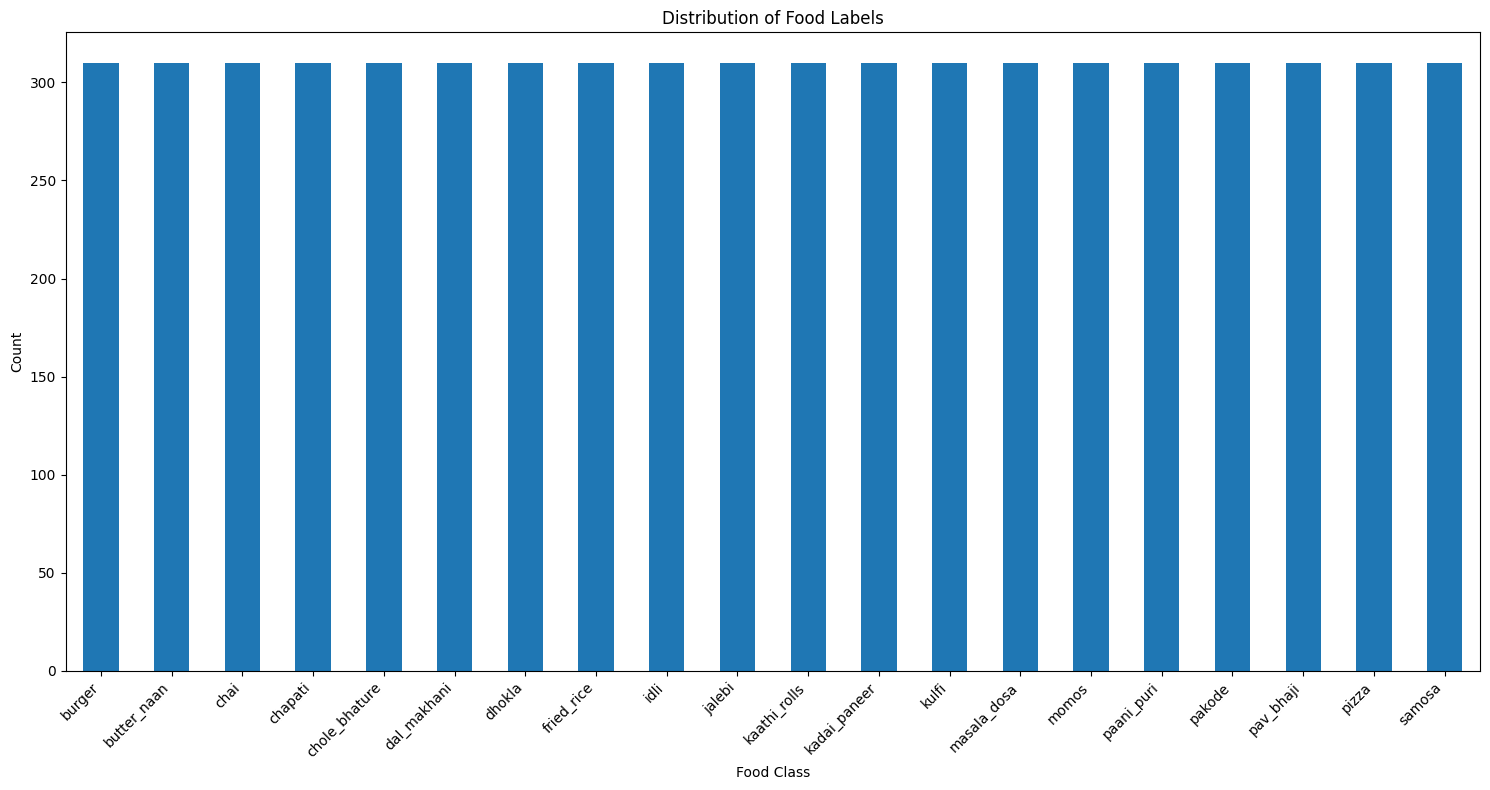

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each food label
food_counts = merged_df['food'].value_counts()

# Create a bar plot
plt.figure(figsize=(15, 8))
food_counts.plot(kind='bar')
plt.title('Distribution of Food Labels')
plt.xlabel('Food Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Data is now balanced.

Start Fine tuning from here

In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path="/content/drive/MyDrive/FoodData_aug/augumented_data_with_captions.csv"

In [ ]:


import pandas as pd


data = pd.read_csv(data_path)



In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
data

,food,image_path,caption
0,pav_bhaji,/content/drive/MyDrive/FoodData_aug/pav_bhaji/...,"Pav bhaji is a dish of a thick, spiced curry o..."
1,paani_puri,/content/drive/MyDrive/FoodData_aug/paani_puri...,"This snack features a small, hollow, crisp-fri..."
2,butter_naan,/content/drive/MyDrive/FoodData_aug/butter_naa...,"Butter naan is a leavened flatbread, character..."
3,kadai_paneer,/content/drive/MyDrive/FoodData_aug/kadai_pane...,"This dish features paneer, a non-melting chees..."
4,momos,/content/drive/MyDrive/FoodData_aug/momos/067.jpg,Momos are dumplings made of a thin dough wrapp...
...,...,...,...
6195,kulfi,/content/drive/MyDrive/FoodData_aug/kulfi/056.jpg,"Kulfi is a dense, frozen dessert made from mil..."
6196,chole_bhature,/content/drive/MyDrive/FoodData_aug/chole_bhat...,This dish pairs a spicy and savory chickpea cu...
6197,fried_rice,/content/drive/MyDrive/FoodData_aug/fried_rice...,Fried rice is a dish of cooked rice stir-fried...
6198,fried_rice,/content/drive/MyDrive/FoodData_aug/fried_rice...,Fried rice is a dish of cooked rice stir-fried...


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

num_images_to_display = 7
for i in range(num_images_to_display):
    image_path = data.iloc[i]['image_path']
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(data.iloc[i]['caption'])
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pandas as pd
from datasets import Dataset
from PIL import Image
import torch
from torch.utils.data import DataLoader
from transformers import CLIPProcessor, CLIPModel


In [ ]:
dataset = Dataset.from_pandas(data)


In [ ]:

train_test = dataset.train_test_split(test_size=0.05, seed=42)

train_dataset = train_test["train"]
test_dataset = train_test["test"]

In [ ]:
train_dataset

Dataset({
    features: ['food', 'image_path', 'caption'],
    num_rows: 5890
})

In [ ]:
print(len(train_dataset))

print(len(test_dataset))

5890
310


In [ ]:
from transformers import CLIPModel, CLIPProcessor
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
import pandas as pd
import torch
from PIL import Image
from transformers import CLIPModel, CLIPProcessor


# Load your dataset
csv_path = "/content/drive/MyDrive/FoodData_aug/augumented_data_with_captions.csv"
df = pd.read_csv(csv_path)

# Take some random samples
samples = df.sample(5, random_state=42)

# Iterate over samples and run CLIP zero-shot matching
for idx, row in samples.iterrows():
    image_path = row['image_path']
    text = row['caption']

    # Load image
    image = Image.open(image_path).convert("RGB")

    # Preprocess (with truncation)
    inputs = processor(
        text=[text],
        images=image,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=77
    ).to(device)

    # Get similarity score
    with torch.no_grad():
        outputs = model(**inputs)
        logits_per_image = outputs.logits_per_image
        probs = logits_per_image.softmax(dim=1)

    print(f"🍽️ Food: {row['food']}")
    print(f"🖼️ Image Path: {image_path}")
    print(f"💬 Caption: {text[:80]}...")  # show first 80 chars for readability
    print(f"🔹 Match Confidence: {probs.item():.4f}\n")


🍽️ Food: pav_bhaji
🖼️ Image Path: /content/drive/MyDrive/FoodData_aug/pav_bhaji/125.jpg
💬 Caption: Pav bhaji is a dish of a thick, spiced curry of mashed mixed vegetables, served ...
🔹 Match Confidence: 1.0000

🍽️ Food: fried_rice
🖼️ Image Path: /content/drive/MyDrive/FoodData_aug/fried_rice/348.jpg
💬 Caption: Fried rice is a dish of cooked rice stir-fried with chopped vegetables, sauces, ...
🔹 Match Confidence: 1.0000

🍽️ Food: idli
🖼️ Image Path: /content/drive/MyDrive/FoodData_aug/idli/130.jpg
💬 Caption: Idli is a soft, porous, steamed savory cake made from a fermented batter of grou...
🔹 Match Confidence: 1.0000

🍽️ Food: pav_bhaji
🖼️ Image Path: /content/drive/MyDrive/FoodData_aug/pav_bhaji/021.jpg
💬 Caption: Pav bhaji is a dish of a thick, spiced curry of mashed mixed vegetables, served ...
🔹 Match Confidence: 1.0000

🍽️ Food: chole_bhature
🖼️ Image Path: /content/drive/MyDrive/FoodData_aug/chole_bhature/165.jpg
💬 Caption: This dish pairs a spicy and savory chickpea curry with a 

In [ ]:

# query_row = df.sample(1, random_state=123).iloc[0]
# query_image_path = query_row['image_path']
# query_image = Image.open(query_image_path).convert("RGB")

# print(f"🔍 Query Image: {query_row['food']} ({query_image_path})\n")

# # Get embeddings for query image
# image_inputs = processor(images=query_image, return_tensors="pt").to(device)
# with torch.no_grad():
#     image_emb = model.get_image_features(**image_inputs)
#     image_emb /= image_emb.norm(p=2, dim=-1, keepdim=True)  # normalize

# # Get embeddings for all text captions
# text_list = df['caption'].tolist()
# text_inputs = processor(text=text_list, return_tensors="pt", padding=True, truncation=True, max_length=77).to(device)
# with torch.no_grad():
#     text_embs = model.get_text_features(**text_inputs)
#     text_embs /= text_embs.norm(p=2, dim=-1, keepdim=True)

# # Compute cosine similarities
# similarities = (image_emb @ text_embs.T).squeeze(0)

# # Get top-5 most similar captions
# top_k = 5
# top_indices = similarities.topk(top_k).indices.cpu().numpy()

# print(f"📸 Query Image Food: {query_row['food']}")
# print(f"🏆 Top {top_k} Matching Captions:\n")
# for i, idx in enumerate(top_indices):
#     print(f"{i+1}. 🍽️ {df.iloc[idx]['food']}")
#     print(f"   💬 {df.iloc[idx]['caption'][:100]}...")
#     print(f"   🔹 Similarity: {similarities[idx].item():.4f}\n")


In [ ]:
from tqdm import tqdm

In [ ]:
train_dataset

Dataset({
    features: ['food', 'image_path', 'caption'],
    num_rows: 5890
})

In [ ]:
import numpy as np


In [ ]:
image_paths, captions = [], []

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import numpy as np
import torch

#  Define training image augmentations (same as ImageDataGenerator)
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),

    transforms.RandomAffine(degrees=0, scale=(0.9, 1.1)),  # zoom_range
    transforms.ToTensor(),
])

#  Dataset with transform support
class ImageTitleDataset(Dataset):
    def __init__(self, image_paths, captions, processor, transform=None):
        self.image_paths = image_paths
        self.captions = captions
        self.processor = processor
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        if isinstance(idx, (list, np.ndarray)):
            items = []
            for i in idx:
                image = Image.open(self.image_paths[i]).convert("RGB")
                if self.transform:
                    image = self.transform(image)
                caption = self.captions[i]
                items.append({"image": image, "text": caption})
            return items

        image = Image.open(self.image_paths[idx]).convert("RGB")
        if self.transform:
            image = self.transform(image)
        caption = self.captions[idx]
        return {"image": image, "text": caption}


#  Collate function compatible with CLIP/Processor
def collate_fn(batch):
    if isinstance(batch[0], list):
        batch = [item for sublist in batch for item in sublist]

    images = [item["image"] for item in batch]
    texts = [item["text"] for item in batch]

    # Processor expects PIL/numpy, not Tensor → convert back if needed
    if isinstance(images[0], torch.Tensor):
        to_pil = transforms.ToPILImage()
        images = [to_pil(img) for img in images]

    inputs = processor(
        text=texts,
        images=images,
        return_tensors="pt",
        padding=True,
        truncation=True
    )
    return inputs


#  Build dataset and dataloader (train_dataset already exists)
image_paths = [d['image_path'] for d in train_dataset]
captions = [d['caption'] for d in train_dataset]

dataset = ImageTitleDataset(image_paths, captions, processor, transform=train_transforms)

dataloader = DataLoader(
    dataset,
    batch_size=32,
    shuffle=True,
    collate_fn=collate_fn,
    drop_last=True
)

#  Example sanity check
batch = next(iter(dataloader))
print(batch.keys())
print(batch["pixel_values"].shape)
print(batch["input_ids"].shape)


KeysView({'pixel_values': tensor([[[[-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923],
          [-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923],
          [-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923],
          ...,
          [-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923],
          [-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923],
          [-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923]],

         [[-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7521],
          [-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7521],
          [-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7521],
          ...,
          [-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7521],
          [-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7521],
          [-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7521]],

         [[-1.4802, -1.4802, -1.4802,  ..., -1.4802, -1.4802, -1.4802],
    

In [ ]:
# from torch.utils.data import Dataset
# from PIL import Image
# import numpy as np

# class ImageTitleDataset(Dataset):
#     def __init__(self, image_paths, captions, processor):
#         self.image_paths = image_paths
#         self.captions = captions
#         self.processor = processor

#     def __len__(self):
#         return len(self.image_paths)

#     def __getitem__(self, idx):
#         # ✅ Handle both single index and list of indices
#         if isinstance(idx, (list, np.ndarray)):
#             items = []
#             for i in idx:
#                 image = Image.open(self.image_paths[i]).convert("RGB")
#                 caption = self.captions[i]
#                 items.append({"image": image, "text": caption})
#             return items

#         image = Image.open(self.image_paths[idx]).convert("RGB")
#         caption = self.captions[idx]
#         return {"image": image, "text": caption}


# def collate_fn(batch):
#     # flatten if __getitem__ returned list of items
#     if isinstance(batch[0], list):
#         batch = [item for sublist in batch for item in sublist]

#     images = [item["image"] for item in batch]
#     texts = [item["text"] for item in batch]
#     inputs = processor(
#         text=texts,
#         images=images,
#         return_tensors="pt",
#         padding=True,
#         truncation=True
#     )
#     return inputs


# # Build dataset

# image_paths = [d['image_path'] for d in train_dataset]
# captions = [d['caption'] for d in train_dataset]

# dataset = ImageTitleDataset(image_paths, captions, processor)
# dataloader = DataLoader(
#     dataset,
#     batch_size=32,
#     shuffle=True,
#     collate_fn=collate_fn,
#     drop_last=True
# )


LOad back code

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# import json

# with open("/content/drive/MyDrive/CLIP_dataset/clean_dataset.json", "r") as f:
#     data = json.load(f)

# image_paths, captions = data["image_paths"], data["captions"]
# print("Loaded", len(image_paths), "items from Drive ✅")


In [ ]:

# Freeze all vision encoder parameters
for param in model.vision_model.parameters():
    param.requires_grad = False

# Freeze all text encoder parameters
for param in model.text_model.parameters():
    param.requires_grad = False

# Unfreeze the visual projection head (maps image embeddings → CLIP space)
for param in model.visual_projection.parameters():
    param.requires_grad = True



# Unfreeze the text projection layer (maps text embeddings → CLIP space)
for param in model.text_projection.parameters():
    param.requires_grad = True


optimizer = torch.optim.AdamW(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=1e-5,
    betas=(0.9, 0.999),
    eps=1e-8,
    weight_decay=0.0001
)

loss_img = torch.nn.CrossEntropyLoss()
loss_txt = torch.nn.CrossEntropyLoss()
num_epochs = 19

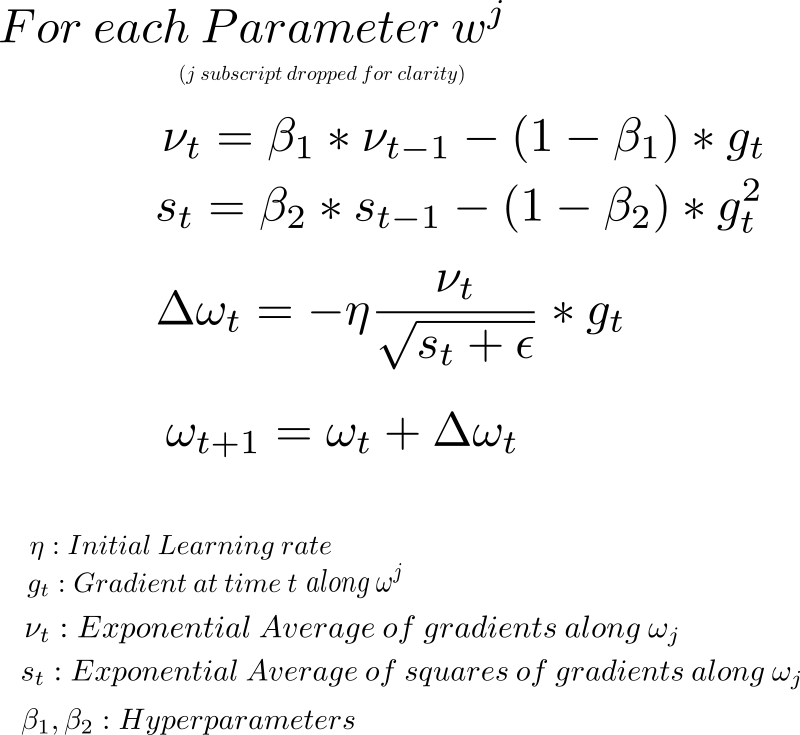

In [ ]:
import os
import torch

# Directory where checkpoints are stored
DRIVE_SAVE_DIR = "/content/drive/MyDrive/food_model_checkpoints_aug"
os.makedirs(DRIVE_SAVE_DIR, exist_ok=True)  # ✅ ensures the folder exists

# Path to checkpoint file (you can change filename as needed)
CHECKPOINT_TO_LOAD = "model_epoch_15.pth"  # ← change this to whichever checkpoint you want to resume from
checkpoint_path = os.path.join(DRIVE_SAVE_DIR, CHECKPOINT_TO_LOAD)

# Default start values
start_epoch = 0
last_loss = None

# --- Load checkpoint if available ---
if os.path.exists(checkpoint_path):
    print(f"✅ Resuming training from checkpoint: {checkpoint_path}")

    # Use map_location for Colab safety (GPU/CPU mismatch handling)
    checkpoint = torch.load(checkpoint_path, map_location="cuda" if torch.cuda.is_available() else "cpu")

    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    start_epoch = checkpoint['epoch']  # resume from next epoch
    last_loss = checkpoint['loss']

    print(f"🔄 Loaded model from epoch {start_epoch} with last loss {last_loss:.4f}")
else:
    print("⚠️ No checkpoint found. Starting training from scratch.")


✅ Resuming training from checkpoint: /content/drive/MyDrive/food_model_checkpoints_aug/model_epoch_15.pth
🔄 Loaded model from epoch 15 with last loss 1.0715


Found best Accuracy at 15.


In [ ]:
from tqdm import tqdm
import os # Needed to create the directory


for epoch in range(start_epoch,num_epochs):
    model.train() # Set model to training mode
    pbar = tqdm(dataloader, total=len(dataloader))
    epoch_loss = 0.0

    for batch in pbar:
        optimizer.zero_grad()

        images = batch["pixel_values"].to(device)
        texts = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        outputs = model(
            pixel_values=images,
            input_ids=texts,
            attention_mask=attention_mask
        )
        logits_per_image = outputs.logits_per_image
        logits_per_text = outputs.logits_per_text

        ground_truth = torch.arange(images.size(0), device=images.device)

        total_loss = (
            loss_img(logits_per_image, ground_truth) +
            loss_txt(logits_per_text, ground_truth)
        ) / 2

        # Backward pass
        total_loss.backward()
        optimizer.step()

        epoch_loss += total_loss.item()
        pbar.set_description(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss.item():.4f}")

    # --- 3. Save a checkpoint at the end of EACH epoch ---
    # Calculate average loss for this epoch
    avg_epoch_loss = epoch_loss / len(dataloader)


    checkpoint_path = os.path.join(DRIVE_SAVE_DIR, f"model_epoch_{epoch+1}.pth")

    checkpoint = {
        'epoch': epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': avg_epoch_loss,
    }

    # Save the checkpoint
    torch.save(checkpoint, checkpoint_path)

    print(f"\n Epoch {epoch+1} complete. Average Loss: {avg_epoch_loss:.4f}. Checkpoint saved to '{checkpoint_path}'")

print("Fine-tuning completed!")

Epoch 16/19, Loss: 1.1626: 100%|██████████| 184/184 [03:03<00:00,  1.00it/s]



 Epoch 16 complete. Average Loss: 1.0802. Checkpoint saved to '/content/drive/MyDrive/food_model_checkpoints_aug/model_epoch_16.pth'


Epoch 17/19, Loss: 1.0311:  11%|█         | 20/184 [00:20<02:51,  1.04s/it]


KeyboardInterrupt: 

In [ ]:
# stop////

In [ ]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


In [ ]:
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"


In [ ]:
stop////

In [ ]:
import torch

CHECKPOINT_PATH = "/content/drive/MyDrive/food_model_checkpoints_aug/model_epoch_15.pth"
checkpoint = torch.load(CHECKPOINT_PATH, map_location=device)

model.load_state_dict(checkpoint['model_state_dict'])
model.eval()


CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e-05,

In [ ]:
from transformers import AutoConfig, AutoModel
import torch
import os

# your model is already loaded as `model`
# and the checkpoint is loaded with model.load_state_dict(...)

# 1️⃣ Create a directory for saving
save_dir = "/content/drive/MyDrive/food_model"
os.makedirs(save_dir, exist_ok=True)

# 2️⃣ Save model weights in Hugging Face format
model.save_pretrained(save_dir)

# 3️⃣ (optional) Save tokenizer or processor if your model uses one
# processor.save_pretrained(save_dir)   # only if applicable

print(f"Model saved successfully in {save_dir}")


Model saved successfully in /content/drive/MyDrive/food_model


In [ ]:
processor.save_pretrained(save_dir)


[]

In [ ]:
test_dataset

Dataset({
    features: ['food', 'image_path', 'caption'],
    num_rows: 310
})

In [ ]:

from PIL import Image
from torch.nn.functional import normalize
from tqdm import tqdm
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

print(f"🧾 Test dataset contains {len(test_dataset)} samples.")

test_image_paths = [sample['image_path'] for sample in test_dataset]
test_captions = [sample['caption'] for sample in test_dataset]

image_features_list = []

print("Computing image embeddings for test set...")
with torch.no_grad():
    for sample in tqdm(test_dataset, desc="Encoding images"):
        image = Image.open(sample['image_path']).convert("RGB")
        inputs = processor(images=image, return_tensors="pt").to(device)
        img_emb = model.get_image_features(**inputs)
        img_emb = normalize(img_emb, p=2, dim=-1)  # ensure L2 normalization
        image_features_list.append(img_emb)

image_features = torch.cat(image_features_list, dim=0)
print("✅ Image embeddings shape:", image_features.shape)

text_features_list = []

print("Computing text embeddings for test set...")
with torch.no_grad():
    for sample in tqdm(test_dataset, desc="Encoding captions"):
        inputs = processor(text=sample['caption'], return_tensors="pt", padding=True,truncation=True).to(device)
        txt_emb = model.get_text_features(**inputs)
        txt_emb = normalize(txt_emb, p=2, dim=-1)  # ensure L2 normalization
        text_features_list.append(txt_emb)

text_features = torch.cat(text_features_list, dim=0)
print(" Text embeddings shape:", text_features.shape)

print(" Checking L2 norms (should be ~1.0):")
print("Text norm mean:", text_features.norm(dim=-1).mean().item())
print("Image norm mean:", image_features.norm(dim=-1).mean().item())

print(" Computing similarity matrix using dot product...")
# since both are normalized, dot product = cosine similarity
similarity_matrix = text_features @ image_features.T
print("Similarity matrix shape:", similarity_matrix.shape)






🧾 Test dataset contains 310 samples.
Computing image embeddings for test set...


Encoding images: 100%|██████████| 310/310 [00:30<00:00, 10.33it/s]


✅ Image embeddings shape: torch.Size([310, 512])
Computing text embeddings for test set...


Encoding captions: 100%|██████████| 310/310 [00:02<00:00, 113.21it/s]

 Text embeddings shape: torch.Size([310, 512])
 Checking L2 norms (should be ~1.0):
Text norm mean: 1.0
Image norm mean: 1.0
 Computing similarity matrix using dot product...
Similarity matrix shape: torch.Size([310, 310])



📝 Query: Pav bhaji is a dish of a thick, spiced curry of mashed mixed vegetables, served with a soft, butter-toasted bread roll. The vegetable curry is smooth and pulpy, with a rich, tangy, and spicy flavor. The bread is light, fluffy, and buttery. The curry is a source of complex carbohydrates, fiber, and various vitamins from the vegetables. The bread provides refined carbohydrates, and the dish has a significant fat content from added butter.
Top 5 retrieved images:


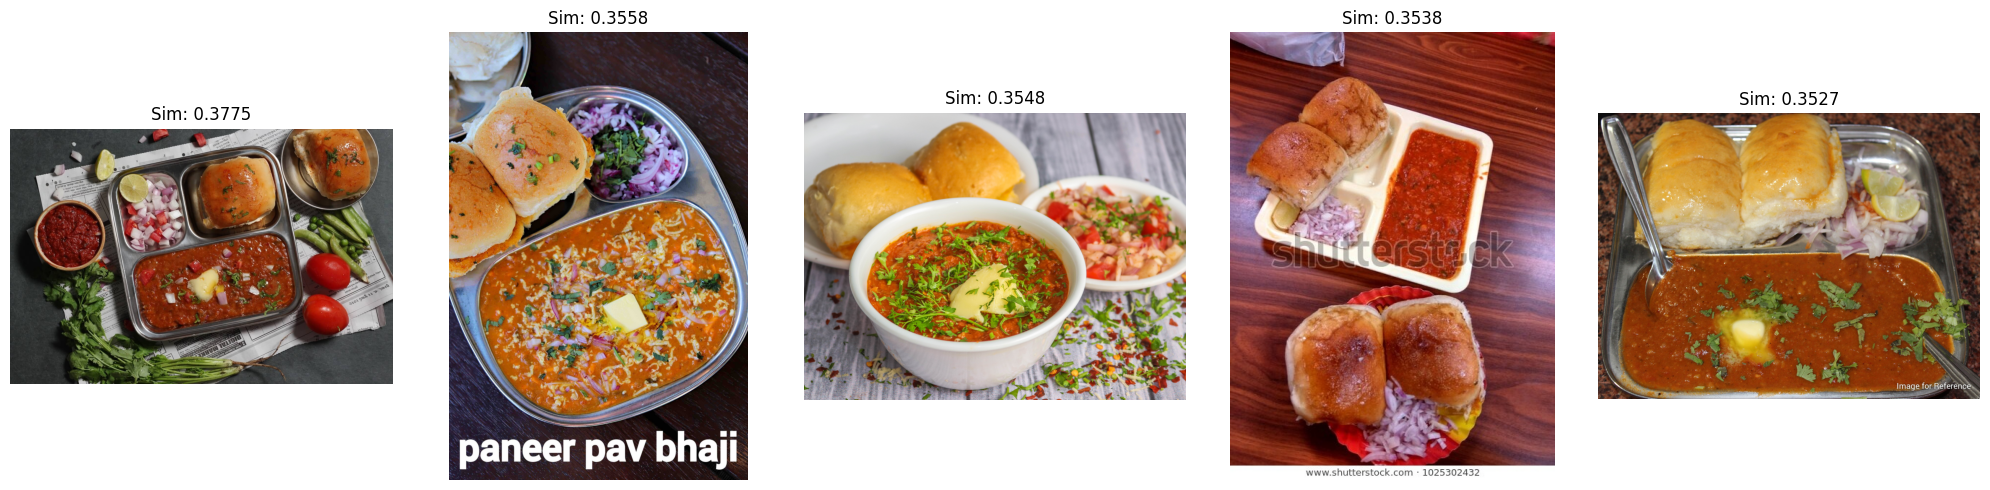

In [ ]:
import random # ✅ Import the random module

def retrieve_images(query_caption, image_features, image_paths, model, processor, top_k=5):
    model.eval()
    with torch.no_grad():
        # Encode the text query
        inputs = processor(text=query_caption, return_tensors="pt",padding=True,truncation=True).to(device)
        text_emb = model.get_text_features(**inputs)
        text_emb = normalize(text_emb, p=2, dim=-1)

        # Compute similarity
        sim_scores = (text_emb @ image_features.T).squeeze(0)

        # Get top-k indices
        topk_values, topk_indices = sim_scores.topk(top_k)

        # Display
        print(f"\n📝 Query: {query_caption}")
        print(f"Top {top_k} retrieved images:")
        plt.figure(figsize=(20, 5))
        for i, idx in enumerate(topk_indices):
            img = Image.open(image_paths[idx]).convert("RGB")
            plt.subplot(1, top_k, i + 1)
            plt.imshow(img)
            plt.title(f"Sim: {topk_values[i]:.4f}")
            plt.axis("off")
        plt.tight_layout()
        plt.show()


query_caption_test = random.choice(test_captions)
retrieve_images(query_caption_test, image_features, test_image_paths, model, processor, top_k=5)

In [ ]:
import torch
from torch.nn.functional import normalize
from tqdm import tqdm  # optional, for progress bar

def generate_caption_features(captions, model, processor, device, batch_size=32):

    model.eval()
    all_features = []

    with torch.no_grad():
        for i in tqdm(range(0, len(captions), batch_size), desc="Encoding captions"):
            batch = captions[i:i+batch_size]
            inputs = processor(text=batch, return_tensors="pt", padding=True, truncation=True).to(device)
            text_emb = model.get_text_features(**inputs)
            text_emb = normalize(text_emb, p=2, dim=-1)
            all_features.append(text_emb.cpu())

    return torch.cat(all_features, dim=0)



Encoding captions: 100%|██████████| 10/10 [00:00<00:00, 13.04it/s]


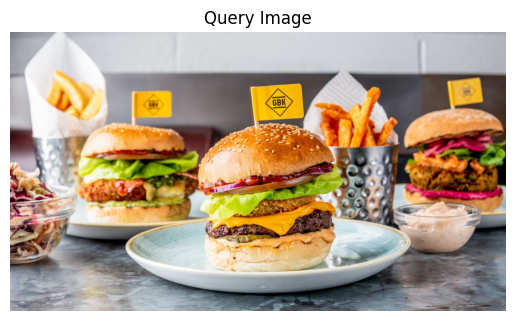


Top 1 retrieved captions for this image:
1. A burger consists of a cooked savory patty, often made from vegetables, legumes, or paneer, placed inside a soft, sliced bread bun. Its flavor is savory and can be spicy, complemented by the mildness of the bun and the addition of creamy sauces or crisp vegetables. It is a source of carbohydrates from the bread, with protein content dependent on the patty's base. Fats are present, varying with patty composition and added sauces, while vegetables contribute some fiber and vitamins.  (Sim: 0.3555)


In [ ]:
import torch
from torch.nn.functional import normalize
import matplotlib.pyplot as plt
from PIL import Image

def retrieve_captions(query_image_path, caption_texts, caption_features, model, processor, device, top_k=5):
    model.eval()
    with torch.no_grad():

        img = Image.open(query_image_path).convert("RGB")
        inputs = processor(images=img, return_tensors="pt").to(device)
        img_emb = model.get_image_features(**inputs)
        img_emb = normalize(img_emb, p=2, dim=-1)

        caption_features = caption_features.to(device)


        sim_scores = (img_emb @ caption_features.T).squeeze(0)

        topk_values, topk_indices = sim_scores.topk(top_k)


        plt.imshow(img)
        plt.axis("off")
        plt.title("Query Image")
        plt.show()

        print(f"\nTop {top_k} retrieved captions for this image:")
        for i, idx in enumerate(topk_indices):
            print(f"{i+1}. {caption_texts[idx]}  (Sim: {topk_values[i]:.4f})")


caption_features = generate_caption_features(test_captions, model, processor, device, batch_size=32)

query_image_path = random.choice(test_image_paths)
retrieve_captions(query_image_path, test_captions, caption_features, model, processor, device, top_k=1)

In [ ]:
import torch
from torch.nn.functional import normalize
from tqdm import tqdm

def evaluate_image_text_retrieval(image_paths, captions, model, processor, device):
    """
    Compute top-1 accuracy for image-to-text retrieval.
    Assumes one 'correct' caption per image (the first one in `captions`).
    """

    model.eval()
    correct = 0
    total = len(image_paths)

    # Precompute all text features once
    caption_features = generate_caption_features(captions, model, processor, device)
    caption_features = caption_features.to(device)

    with torch.no_grad():
        for img_path, true_caption in tqdm(zip(image_paths, captions), total=total, desc="Evaluating"):
            # Image embedding
            img = Image.open(img_path).convert("RGB")
            inputs = processor(images=img, return_tensors="pt").to(device)
            img_emb = model.get_image_features(**inputs)
            img_emb = normalize(img_emb, p=2, dim=-1)

            # Similarities
            sim_scores = (img_emb @ caption_features.T).squeeze(0)

            # Predicted caption index (most similar)
            pred_idx = sim_scores.argmax().item()
            pred_caption = captions[pred_idx]

            # Top-1 accuracy: correct if same as reference caption
            if pred_caption.strip().lower() == true_caption.strip().lower():
                correct += 1

    accuracy = correct / total
    print(f"\n✅ Retrieval Accuracy (Top-1): {accuracy * 100:.2f}%  ({correct}/{total})")
    return accuracy


In [ ]:
accuracy = evaluate_image_text_retrieval(
    image_paths=test_image_paths,
    captions=test_captions, # Pass the list of captions directly
    model=model,
    processor=processor,
    device=device
)

Evaluating: 100%|██████████| 310/310 [00:13<00:00, 22.35it/s]


✅ Retrieval Accuracy (Top-1): 90.97%  (282/310)


In [ ]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from torch.nn.functional import normalize
from tqdm import tqdm
from PIL import Image

def evaluate_with_confusion_matrix(image_paths, captions, labels, model, processor, device, class_names):
    """
    Evaluate image→text retrieval and generate confusion matrix per class.

    Args:
        image_paths (list): paths to test images
        captions (list): ground-truth captions (one per image)
        labels (list): class labels (same order as image_paths)
        model: CLIP model
        processor: CLIP processor
        device: torch.device
        class_names (list): unique class names for confusion matrix

    Returns:
        cm (ndarray): confusion matrix
    """

    model.eval()
    y_true, y_pred = [], []

    # Precompute caption embeddings
    caption_features = generate_caption_features(captions, model, processor, device)
    caption_features = caption_features.to(device)

    with torch.no_grad():
        for img_path, true_label in tqdm(zip(image_paths, labels), total=len(image_paths), desc="Evaluating"):
            img = Image.open(img_path).convert("RGB")
            inputs = processor(images=img, return_tensors="pt").to(device)
            img_emb = model.get_image_features(**inputs)
            img_emb = normalize(img_emb, p=2, dim=-1)

            # Compute similarity to all captions
            sim_scores = (img_emb @ caption_features.T).squeeze(0)
            pred_idx = sim_scores.argmax().item()

            # Predict class based on retrieved caption
            pred_caption = captions[pred_idx]
            pred_label = infer_label_from_caption(pred_caption, class_names)  # see helper below

            y_true.append(true_label)
            y_pred.append(pred_label)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=class_names)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title("Image→Text Retrieval Confusion Matrix (Top-1)")
    plt.show()

    accuracy = np.trace(cm) / np.sum(cm)


    return cm


In [ ]:
def infer_label_from_caption(caption, class_names):
    caption_lower = caption.lower()
    for cls in class_names:
        if cls.lower() in caption_lower:
            return cls
    return "unknown"


Evaluating: 100%|██████████| 310/310 [00:31<00:00,  9.96it/s]


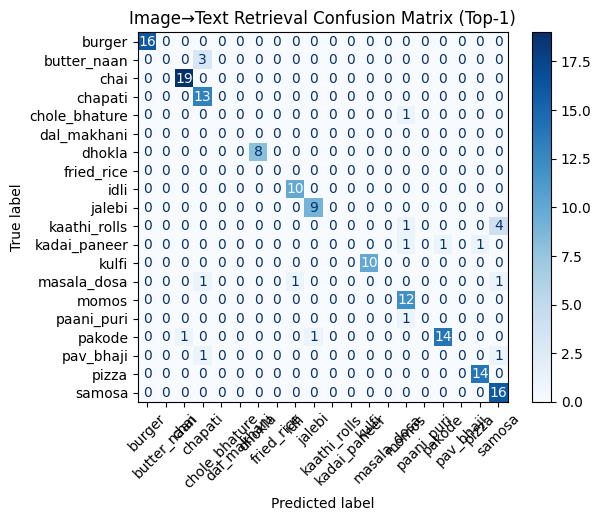

In [ ]:
class_names = list(df['food'].unique()) # Ensure class_names is correctly generated
labels = [sample['food'] for sample in test_dataset] # Extract true labels from test_dataset

cm = evaluate_with_confusion_matrix(
    image_paths=test_image_paths,
    captions=test_captions, # Pass the list of captions directly
    labels=labels,
    model=model,
    processor=processor,
    device=device,
    class_names=class_names
)